## Deep Neural Network model with one hot encoding
*Summary:* In this notebook, we use a DNN model to predict attack/normal labels.

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

df = pd.concat([train, test]).reset_index(drop=True)
df = df.drop(columns=["id"])
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [52]:
labels = df['attack_cat']
x_df = df.drop(columns=['label', 'attack_cat']).reset_index(drop=True)

### Preprocessing

In [53]:
cat_cols = x_df.select_dtypes(exclude=np.number).columns
num_cols = x_df.select_dtypes(include=np.number).columns

one_hot_cat = []
for cat in cat_cols:
    one_hot_cat.append(pd.get_dummies(x_df[cat]))

x_df = pd.concat([x_df[num_cols]] + one_hot_cat, axis=1)
x_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,3pc,a/n,aes-sp3-d,any,argus,aris,arp,ax.25,bbn-rcc,bna,br-sat-mon,cbt,cftp,chaos,compaq-peer,cphb,cpnx,crtp,crudp,dcn,ddp,ddx,dgp,egp,eigrp,emcon,encap,etherip,fc,fire,ggp,gmtp,gre,hmp,i-nlsp,iatp,ib,icmp,idpr,idpr-cmtp,idrp,ifmp,igmp,igp,il,ip,ipcomp,ipcv,ipip,iplt,ipnip,ippc,ipv6,ipv6-frag,ipv6-no,ipv6-opts,ipv6-route,ipx-n-ip,irtp,isis,iso-ip,iso-tp4,kryptolan,l2tp,larp,leaf-1,leaf-2,merit-inp,mfe-nsp,mhrp,micp,mobile,mtp,mux,narp,netblt,nsfnet-igp,nvp,ospf,pgm,pim,pipe,pnni,pri-enc,prm,ptp,pup,pvp,qnx,rdp,rsvp,rtp,rvd,sat-expak,sat-mon,sccopmce,scps,sctp,sdrp,secure-vmtp,sep,skip,sm,smp,snp,sprite-rpc,sps,srp,st2,stp,sun-nd,swipe,tcf,tcp,tlsp,tp++,trunk-1,trunk-2,ttp,udp,unas,uti,vines,visa,vmtp,vrrp,wb-expak,wb-mon,wsn,xnet,xns-idp,xtp,zero,-,dhcp,dns,ftp,ftp-data,http,irc,pop3,radius,smtp,snmp,ssh,ssl,ACC,CLO,CON,ECO,FIN,INT,PAR,REQ,RST,URN,no
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

We standardize the numerical features to satisfy the assumption that many ML models have on the provided data.

In [54]:
from sklearn.preprocessing import StandardScaler

n_num_cols = len(num_cols)
sc = StandardScaler()
x_df.iloc[:, :n_num_cols] = sc.fit_transform(x_df.iloc[:, :n_num_cols])

x_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,3pc,a/n,aes-sp3-d,any,argus,aris,arp,ax.25,bbn-rcc,bna,br-sat-mon,cbt,cftp,chaos,compaq-peer,cphb,cpnx,crtp,crudp,dcn,ddp,ddx,dgp,egp,eigrp,emcon,encap,etherip,fc,fire,ggp,gmtp,gre,hmp,i-nlsp,iatp,ib,icmp,idpr,idpr-cmtp,idrp,ifmp,igmp,igp,il,ip,ipcomp,ipcv,ipip,iplt,ipnip,ippc,ipv6,ipv6-frag,ipv6-no,ipv6-opts,ipv6-route,ipx-n-ip,irtp,isis,iso-ip,iso-tp4,kryptolan,l2tp,larp,leaf-1,leaf-2,merit-inp,mfe-nsp,mhrp,micp,mobile,mtp,mux,narp,netblt,nsfnet-igp,nvp,ospf,pgm,pim,pipe,pnni,pri-enc,prm,ptp,pup,pvp,qnx,rdp,rsvp,rtp,rvd,sat-expak,sat-mon,sccopmce,scps,sctp,sdrp,secure-vmtp,sep,skip,sm,smp,snp,sprite-rpc,sps,srp,st2,stp,sun-nd,swipe,tcf,tcp,tlsp,tp++,trunk-1,trunk-2,ttp,udp,unas,uti,vines,visa,vmtp,vrrp,wb-expak,wb-mon,wsn,xnet,xns-idp,xtp,zero,-,dhcp,dns,ftp,ftp-data,http,irc,pop3,radius,smtp,snmp,ssh,ssl,ACC,CLO,CON,ECO,FIN,INT,PAR,REQ,RST,URN,no
0,-0.208678,-0.130765,-0.165331,-0.046480,-0.098409,-0.002151,0.722026,-0.751628,0.590935,-0.272850,-0.074561,-0.125576,-0.131793,-0.090412,-0.110522,-0.148150,-0.955926,-0.735580,-0.734888,-0.937314,-0.495523,-0.439166,-0.489097,0.535991,-0.478859,-0.143883,-0.039675,-0.681754,0.680262,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.654825,-0.120335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-0.208679,-0.130765,-0.165331,-0.039194,-0.098409,0.210460,0.722026,-0.751628,4.363255,-0.272850,-0.074561,-0.125576,-0.131793,-0.090412,-0.110522,-0.148150,-0.955926,-0.735580,-0.734888,-0.937314,-0.495523,-0.439166,-0.489097,3.610288,-0.478859,-0.143883,-0.039675,-0.681754,0.680262,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.654825,-0.120335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.208679,-0.130765,-0.165331,-0.043188,-0.098409,0.678204,0.722026,-0.751628,4.220037,-0.272850,-0.074561,-0.125576,-0.131794,-0.090412,-0.110522,-0.148150,-0.955926,-0.735580,-0.734888,-0.937314,-0.495523,-0.439166,-0.489097,1.925010,-0.478859,-0.143883,-0.039675,-0.589415,0.680262,-0.617890,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.690790,-0.562869,-0.120335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.208679,-0.130765,-0.165331,-0.044155,-0.098409,0.470318,0.722026,-0.751628,2.850314,-0.272850,-0.074561,-0.125576,-0.131794,-0.090412,-0.110522,-0.148150,-0.955926,-0.735580,-0.734888,-0.937314,-0.495523,-0.439166,-0.489097,1.517047,-0.478859,-0.143883,-0.039675,-0.589415,0.680262,-0.495547,-0.396808,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.562869,-0.120335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

Split the dataset into train, test sets with a $\frac13$ proportion of the data as the test set.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, labels, test_size=.33, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((172640, 196), (85033, 196), (172640,), (85033,))

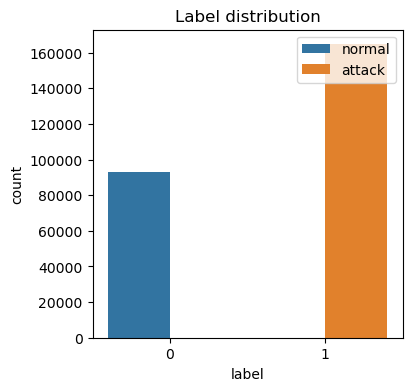

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.countplot(x='label', hue='label', data=df)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("Label distribution")
# plt.xticks(rotation=0)
plt.show()

In [15]:
labels.value_counts()

1    164673
0     93000
Name: label, dtype: int64

We use SMOTE (Synthetic Minority Over-sampling Technique) to balance the training dataset.

In [17]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

(X_res.shape, y_res.shape)

((220646, 56), (220646,))

In [18]:
# shuffle dataframe and split into X and y
train_set = pd.concat([X_res, y_res], axis=1)
train_set = train_set.sample(frac=1)

# reduce set to smaller set
train_set = train_set[:X_train.shape[0]]

X_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1:]

(X_train.shape, y_train.shape)

((172640, 56), (172640, 1))

Split the training set further by using 10000 records as validation samples.

In [57]:
X_val = X_train.iloc[-10000:]
y_val = y_train.iloc[-10000:]

X_train = X_train.iloc[:-10000]
y_train = y_train.iloc[:-10000]

print(f"Training dataset:   {(X_train.shape, y_train.shape)}")
print(f"validation dataset: {(X_val.shape, y_val.shape)}")

Training dataset:   ((162640, 196), (162640,))
validation dataset: ((10000, 196), (10000,))


### Model and training

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [101]:
def create_model():
    model = keras.Sequential(
        [
            layers.Dense(100, activation='relu', input_dim=X_train.shape[1]),
            layers.Dense(100, activation='relu', use_bias=True),
            layers.Dense(100, activation='relu', use_bias=True),
            layers.Dense(100, activation='relu', use_bias=True),
            layers.Dense(10, activation='softmax', use_bias=True)
        ]
    )
    model.compile('adam', loss='categorical_crossentropy', metrics='accuracy')
    return model

model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                3940      
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dense_23 (Dense)            (None, 20)                420       
                                                                 
 dense_24 (Dense)            (None, 20)                420       
                                                                 
 dense_25 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5,221
Trainable params: 5,221
Non-trainable params: 0
_________________________________________________________________


In [102]:
import os

checkpoint_path = "../models/model_dnn_b_default.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

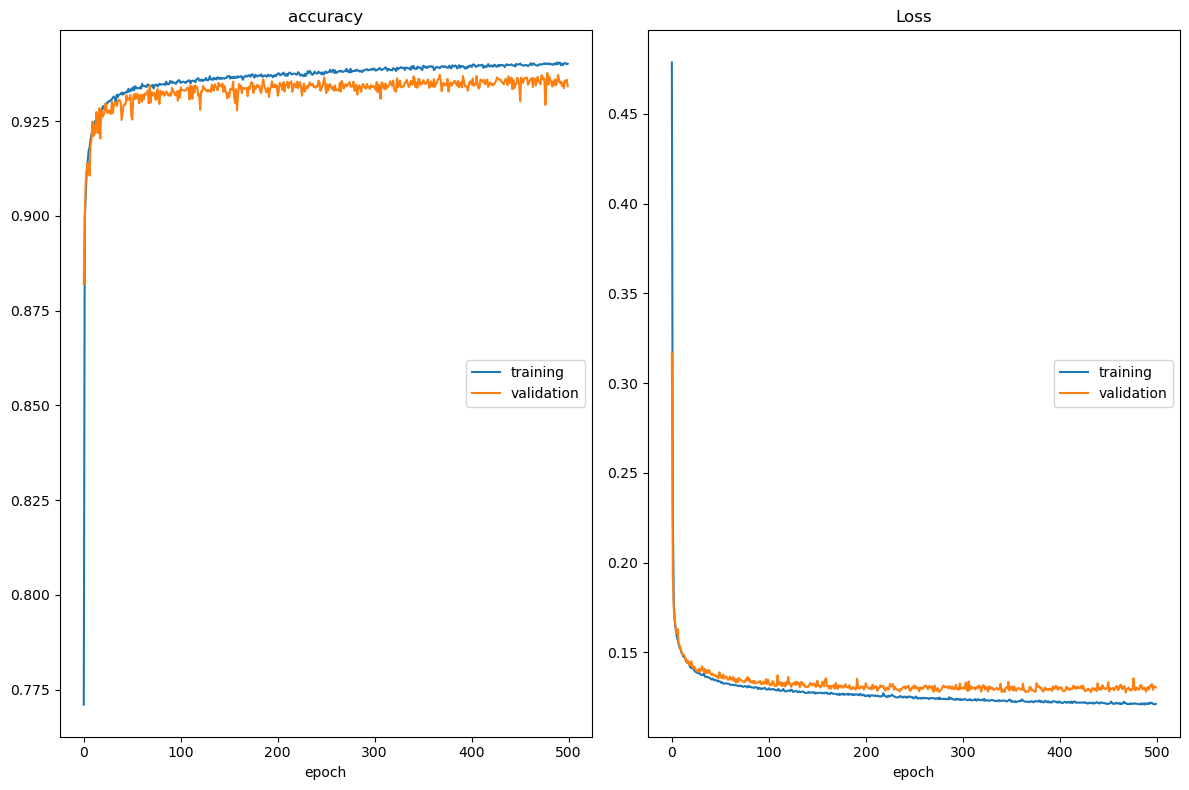

accuracy
	training         	 (min:    0.771, max:    0.940, cur:    0.940)
	validation       	 (min:    0.882, max:    0.938, cur:    0.934)
Loss
	training         	 (min:    0.121, max:    0.479, cur:    0.121)
	validation       	 (min:    0.128, max:    0.317, cur:    0.130)
82/82 - 0s - loss: 0.1212 - accuracy: 0.9401 - val_loss: 0.1304 - val_accuracy: 0.9342 - 498ms/epoch - 6ms/step


In [103]:
EPOCHS = 500
BATCH_SIZE = 2000

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=BATCH_SIZE)

history = model.fit(X_train,
                    y_train, 
                    validation_data=(X_val, y_val),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    verbose=2,
                    callbacks=[PlotLossesKeras(), cp_callback])

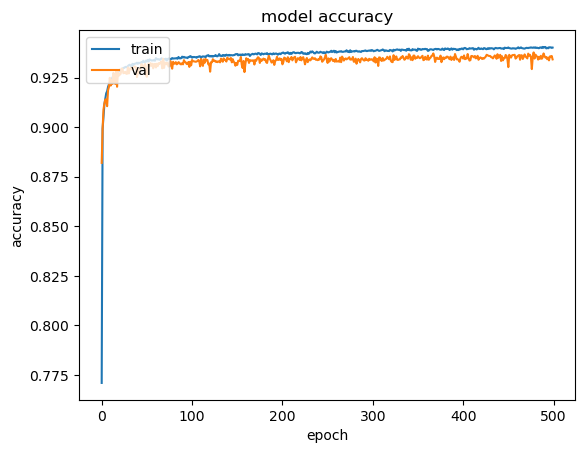

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

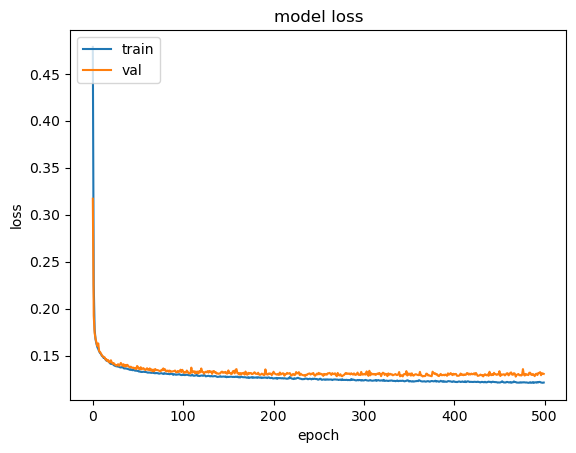

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [106]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape((y_pred.shape[0],))

2658/2658 [==============================] - 3s 1ms/step


In [107]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob = self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, sorted(list(labels.unique())))

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred.round())
cm = np.around(cm / cm.astype('float').sum(axis=1, keepdims=True), decimals=3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

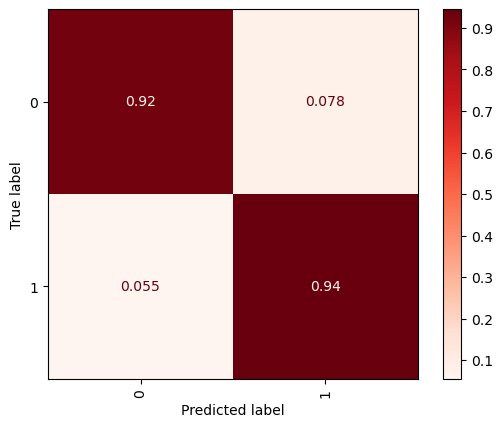

In [109]:
disp.plot(cmap=plt.cm.Reds, xticks_rotation=90)

In [110]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred.round())

0.9369186080698082